In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


Reading the data from an csv file and make the copy of it and showingh the first 5 rows

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
reading_data = pd.read_csv("C:/Users/Cyber/Downloads/Car Selling Price.csv")

In [5]:
df = reading_data.copy()
df.head()

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4 kmpl,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14 kmpl,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7 kmpl,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0 kmpl,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1 kmpl,120000,First Owner,Individual,130000


cleaning data

In [6]:
df.duplicated().sum()

1202

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(6926, 13)

In [9]:
df.isna().sum()

Brand              0
Year               0
Fuel               0
Transmission       0
Engine           208
Max_Power        205
Torque           209
Seats            208
Mileage          208
KM_Driven          0
Owner              0
Seller_Type        0
Selling_Price      0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(6717, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6717 non-null   object 
 1   Year           6717 non-null   int64  
 2   Fuel           6717 non-null   object 
 3   Transmission   6717 non-null   object 
 4   Engine         6717 non-null   object 
 5   Max_Power      6717 non-null   object 
 6   Torque         6717 non-null   object 
 7   Seats          6717 non-null   float64
 8   Mileage        6717 non-null   object 
 9   KM_Driven      6717 non-null   int64  
 10  Owner          6717 non-null   object 
 11  Seller_Type    6717 non-null   object 
 12  Selling_Price  6717 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [13]:
df_1 = df.copy()

we have a three columns that we want to extract the int number from it

In [14]:
df_1['Engine'] = df['Engine'].str.extract('(\d+)').astype('Int64')
df_1['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('Int64')
df_1['Max_Power'] = df['Max_Power'].str.extract('(\d+)').astype('Int64')
df_1['Torque'] = df['Torque'].str.extract('(\d+)').astype('Int64')


df_1.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\2747211242.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_1['Engine'] = df['Engine'].str.extract('(\d+)').astype('Int64')
C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\2747211242.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_1['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('Int64')
C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\2747211242.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_1['Max_Power'] = df['Max_Power'].str.extract('(\d+)').astype('Int64')
C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\27

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248,74,190,5.0,23,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498,103,250,5.0,21,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497,78,12,5.0,17,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396,90,22,5.0,23,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298,88,11,5.0,16,120000,First Owner,Individual,130000


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6717 non-null   object 
 1   Year           6717 non-null   int64  
 2   Fuel           6717 non-null   object 
 3   Transmission   6717 non-null   object 
 4   Engine         6717 non-null   Int64  
 5   Max_Power      6717 non-null   Int64  
 6   Torque         6717 non-null   Int64  
 7   Seats          6717 non-null   float64
 8   Mileage        6717 non-null   Int64  
 9   KM_Driven      6717 non-null   int64  
 10  Owner          6717 non-null   object 
 11  Seller_Type    6717 non-null   object 
 12  Selling_Price  6717 non-null   int64  
dtypes: Int64(4), float64(1), int64(3), object(5)
memory usage: 760.9+ KB


here in engine column it transformed as int32

Data Preprocessing

In [16]:
numeric_columns = df_1.select_dtypes(include = ['int32','int64','float64']).columns
df_1_numeric = df_1[numeric_columns]

In [17]:
df_1_numeric.head()

,Year,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Selling_Price
0,2014,1248,74,190,5.0,23,145500,450000
1,2014,1498,103,250,5.0,21,120000,370000
2,2006,1497,78,12,5.0,17,140000,158000
3,2010,1396,90,22,5.0,23,127000,225000
4,2007,1298,88,11,5.0,16,120000,130000


<Axes: ylabel='Selling_Price'>

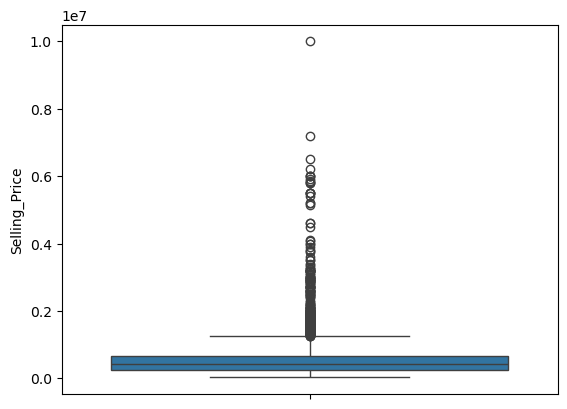

In [18]:
sns.boxplot(df_1_numeric['Selling_Price'])

In [19]:
correlation= df_1_numeric.corr()
print(correlation["Selling_Price"].sort_values(ascending=False))

Selling_Price    1.000000
Max_Power        0.691873
Torque           0.616813
Engine           0.442772
Year             0.427335
Seats            0.158531
Mileage         -0.105434
KM_Driven       -0.161265
Name: Selling_Price, dtype: float64


<Axes: >

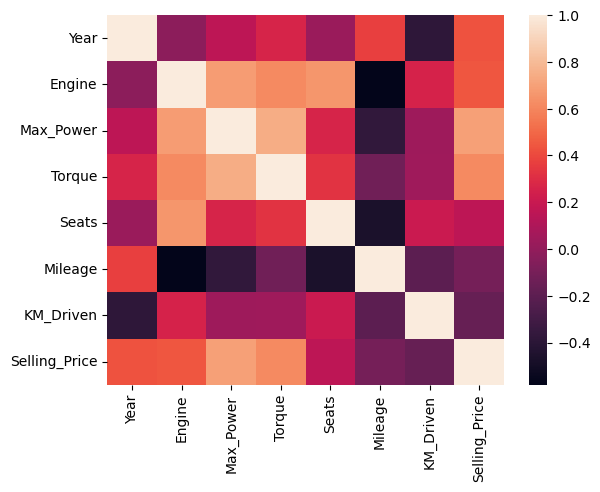

In [20]:


sns.heatmap(correlation)

We need to apply pie chart on the the type of Transmission

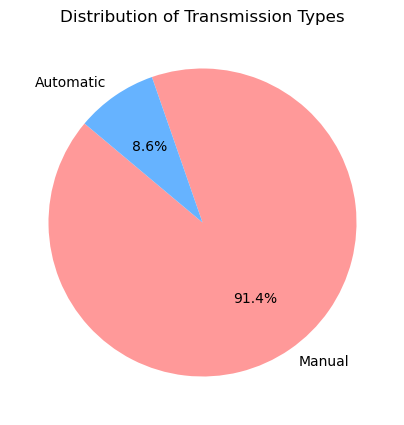

In [21]:
transmission_counts = df_1['Transmission'].value_counts()


colors = ['#ff9999', '#66b3ff']  


plt.figure(figsize=(5, 5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Transmission Types')
plt.show()

we need to show the average price on each of year using scatter plot

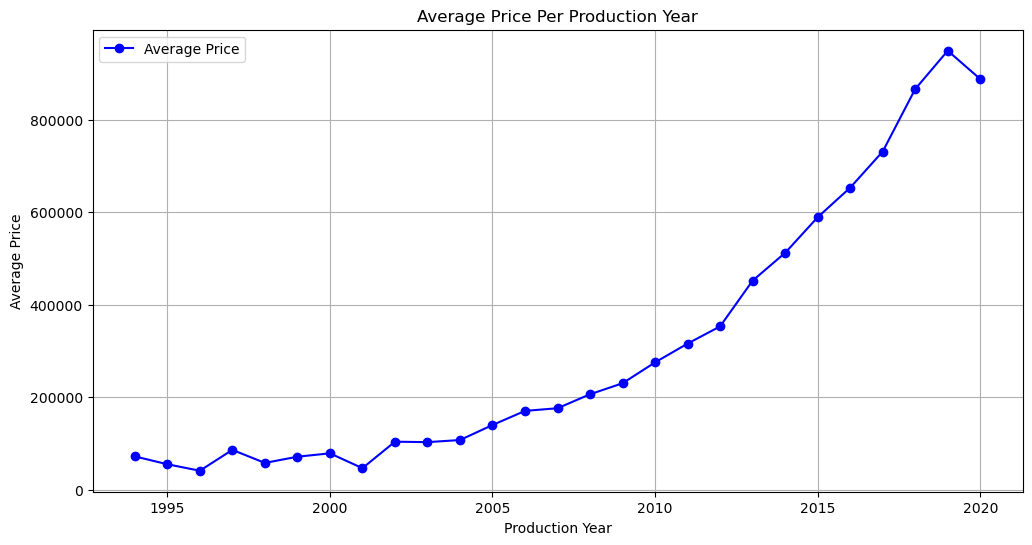

In [22]:
average_price_per_year = df_1_numeric.groupby('Year', as_index=False)['Selling_Price'].mean()


plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Selling_Price'], marker='o', color='blue', label='Average Price')


plt.xlabel('Production Year')
plt.ylabel('Average Price')
plt.title('Average Price Per Production Year')
plt.grid(True)
plt.legend()
plt.show()

In [23]:
df_1.columns

Index(['Brand', 'Year', 'Fuel', 'Transmission', 'Engine', 'Max_Power',
       'Torque', 'Seats', 'Mileage', 'KM_Driven', 'Owner', 'Seller_Type',
       'Selling_Price'],
      dtype='object')

Showing the most buying cars

C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\3220970978.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Brand',y = 'Selling_Price',data = Most_price_models,palette='coolwarm')


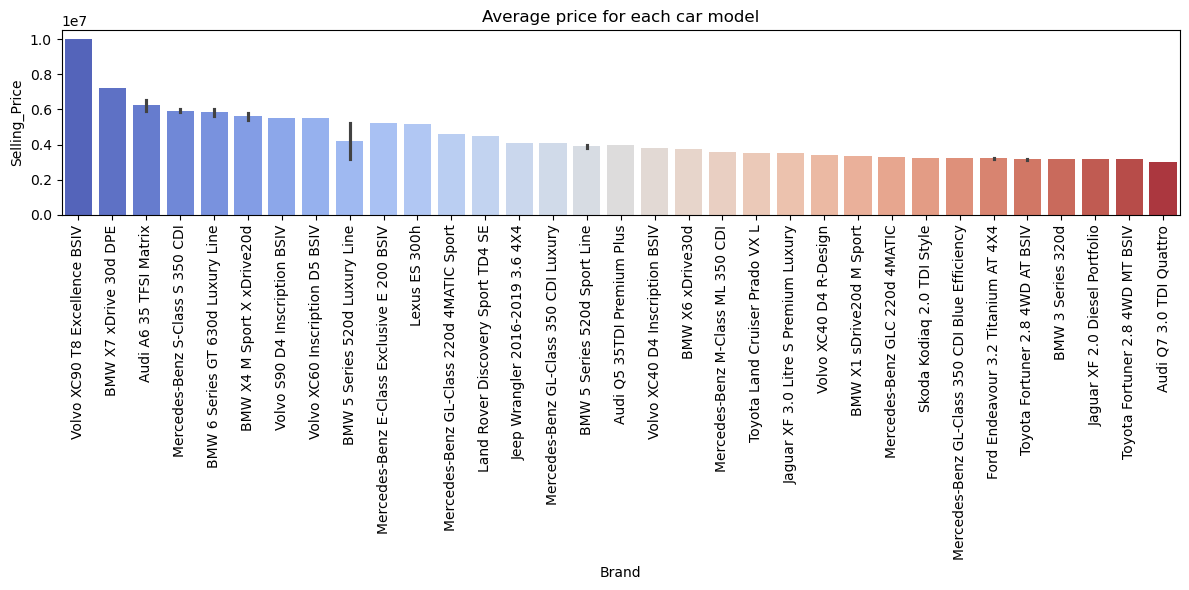

In [24]:
Most_price_models = df_1.sort_values(by = 'Selling_Price', ascending=False).head(50)

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Brand',y = 'Selling_Price',data = Most_price_models,palette='coolwarm')
plt.xticks(rotation = 90)
plt.title('Average price for each car model')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [25]:
df_1['Brand'].unique

<bound method Series.unique of 0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: Brand, Length: 6717, dtype: object>

C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\1069759022.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type', data=df_1, palette='Set1')


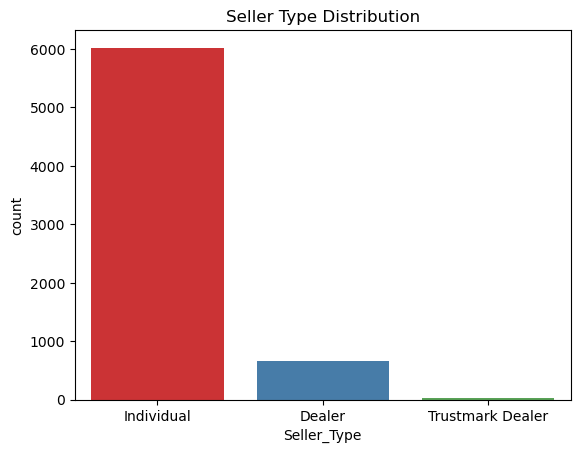

In [26]:
sns.countplot(x='Seller_Type', data=df_1, palette='Set1')
plt.title('Seller Type Distribution')
plt.show()


In [27]:
print(df_1['Torque'].loc[10])

248


In [28]:
# simple linear regression
x = df_1_numeric[['Max_Power']]
y = df_1_numeric['Selling_Price']
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2 , random_state = 42)
x_vald,x_test,y_vald,y_test = train_test_split(x_test,y_test,test_size = 0.5, random_state= 42)


In [29]:
# Print the number of samples in each dataset
print(f"Training set size: {len(x_train)}")
print(f"Validation set size: {len(x_vald)}")
print(f"Test set size: {len(x_test)}")

Training set size: 5373
Validation set size: 672
Test set size: 672


In [30]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_vald_pred = model.predict(x_vald)
y_test_pred = model.predict(x_test)
# evalute the model
mse_vald = mean_squared_error(y_vald,y_vald_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_score_vald = r2_score(y_vald,y_vald_pred)
r2_score_test = r2_score(y_test,y_test_pred)


In [32]:
print(f"R2 for Training: {r2_score_vald}")
print(f"R2 for Test: {r2_score_test}")

R2 for Training: 0.4752402401120499
R2 for Test: 0.5529302392651965


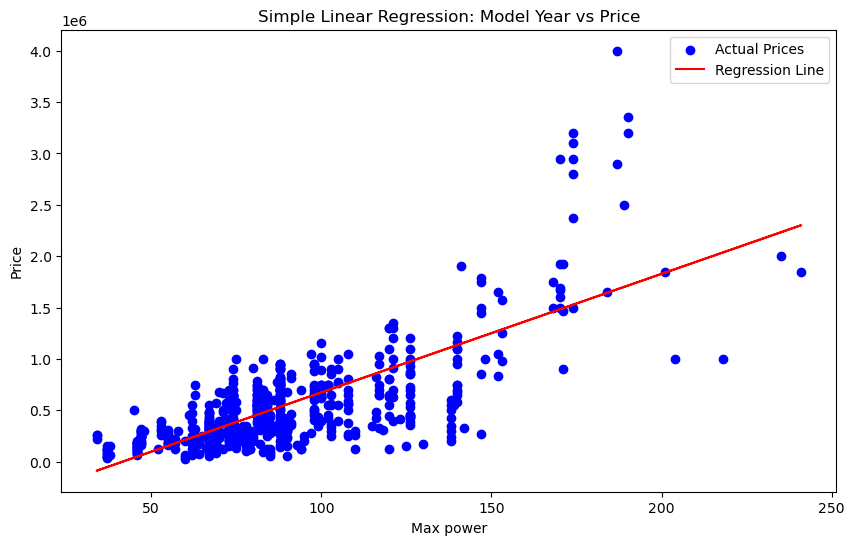

In [33]:
# plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Prices')
plt.plot(x_test, y_test_pred, color='red', label='Regression Line')
plt.xlabel('Max power')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Model Year vs Price')
plt.legend()
plt.show()

In [34]:
# multiple linear regression
x_2 = df_1[['Max_Power','Torque','Engine','Year','KM_Driven']]
scaler = StandardScaler()

# تدريب وتطبيق السكيلر
x_2 = scaler.fit_transform(x_2)
y_2 = df_1['Selling_Price']
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(x_2,y_2,test_size = 0.2 , random_state= 42)
x_vald_2,x_test_2,y_vald_2,y_test_2 = train_test_split(x_test_2,y_test_2,test_size = 0.5, random_state= 42)
# print the number of samples in each dataset 





In [35]:
model_2 = LinearRegression()
model_2.fit(x_train_2,y_train_2)


LinearRegression()

In [36]:
# evalute the model
y_vald_pred_2 = model_2.predict(x_vald_2)
y_test_pred_2 = model_2.predict(x_test_2)
mse_vald_2 = mean_squared_error(y_vald_2 , y_vald_pred_2)
mse_test_2 = mean_squared_error(y_test_2,y_test_pred_2)
r2_score_vald_2 = r2_score(y_vald_2,y_vald_pred_2)
r2_score_test_2 = r2_score(y_test_2,y_test_pred_2)


In [37]:
print(f"R2 for Training: {r2_score_vald_2}")
print(f"R2 for Test: {r2_score_test_2}")

R2 for Training: 0.6179795317293885
R2 for Test: 0.6735604698084676


In [38]:
x_3 = df_1[['Max_Power']]
y_3 = df_1[['Selling_Price']]
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size = 0.2 , random_state= 42)
x_vald_3,x_test_3,y_vald_3,y_test_3 = train_test_split(x_test_3,y_test_3,test_size = 0.5, random_state= 42)



In [39]:
# polynmial regression
pol = PolynomialFeatures(degree = 2)
x_train_3_poly = pol.fit_transform(x_train_3)


In [40]:
model_3 = LinearRegression()
model_3.fit(x_train_3_poly,y_train_3)


LinearRegression()

In [41]:
#evalute the model
y_vald_pred_3 = model_3.predict(pol.fit_transform(x_vald_3))
y_test_pred_3 = model_3.predict(pol.fit_transform(x_test_3))


In [42]:
mse_vald_3 = mean_squared_error(y_vald_3 , y_vald_pred_3)
mse_test_3 = mean_squared_error(y_test_3,y_test_pred_3)
r2_score_vald_3 = r2_score(y_vald_3,y_vald_pred_3)
r2_score_test_3 = r2_score(y_test_3,y_test_pred_3)


In [43]:
print(f"R2 for Training: {r2_score_vald_3}")
print(f"R2 for Test: {r2_score_test_3}")

R2 for Training: 0.6169151503871755
R2 for Test: 0.5817809308653765


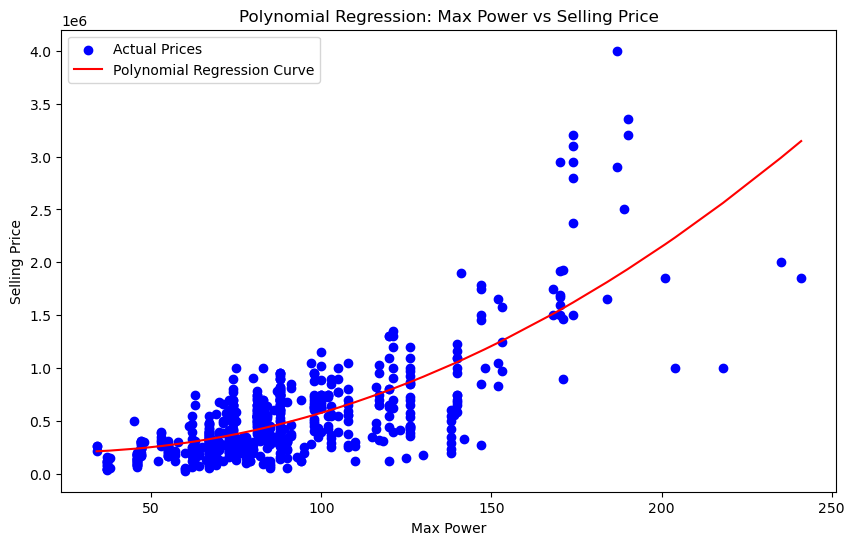

In [44]:
# Plot the polynomial regression results
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(x_test_3['Max_Power'], y_test_3, color='blue', label='Actual Prices')

# Generate predictions for the regression curve
x_test_3_poly = pol.fit_transform(x_test_3)
y_test_3_pred = model_3.predict(x_test_3_poly)

# Sort the data for a smooth curve
sorted_indices = x_test_3['Max_Power'].argsort()
x_sorted = x_test_3['Max_Power'].iloc[sorted_indices]
y_sorted = y_test_3_pred[sorted_indices]

# Plot the regression curve
plt.plot(x_sorted, y_sorted, color='red', label='Polynomial Regression Curve')

# Add labels and title
plt.xlabel('Max Power')
plt.ylabel('Selling Price')
plt.title('Polynomial Regression: Max Power vs Selling Price')
plt.legend()
plt.show()

compare the 3 models of linear regression 

In [45]:
print("\n model 1 (simple linear regression) Evaluation:")
print(f"Validation MSE: {mse_vald}")
print(f"Validation R2 Score: {r2_score_vald}")
print(f"Test MSE: {mse_test}")
print(f"Test R2 Score: {r2_score_test}")
print("_____________________________________________________________")
print("\n model 2 (multiple linear regression) Evaluation:")
print(f"Validation MSE: {mse_vald_2}")
print(f"Validation R2 Score: {r2_score_vald_2}")
print(f"test 2 MSE: {mse_test_2}")
print(f"test R2 score : {r2_score_test_2}")
print("_____________________________________________________________")
print("\n model 3 (polynomial regression) Evaluation :")
print(f"Validation MSE: {mse_vald_3}")
print(f"Validation R2 Score: {r2_score_vald_3}")
print(f"test 2 MSE: {mse_test_3}")
print(f"test R2 score : {r2_score_test_3}")

print("Don't forget to pray for your beloved Prophet Muhammad, may God bless him and grant him peace.")




 model 1 (simple linear regression) Evaluation:
Validation MSE: 113762966213.52907
Validation R2 Score: 0.4752402401120499
Test MSE: 98937190779.70088
Test R2 Score: 0.5529302392651965
_____________________________________________________________

 model 2 (multiple linear regression) Evaluation:
Validation MSE: 82818434161.23587
Validation R2 Score: 0.6179795317293885
test 2 MSE: 72241544638.38535
test R2 score : 0.6735604698084676
_____________________________________________________________

 model 3 (polynomial regression) Evaluation :
Validation MSE: 83049181996.58499
Validation R2 Score: 0.6169151503871755
test 2 MSE: 92552490606.1042
test R2 score : 0.5817809308653765
Don't forget to pray for your beloved Prophet Muhammad, may God bless him and grant him peace.


Logestic Regression


In [46]:
d=pd.read_csv('C:/Users/Cyber/Downloads/Titanic-Dataset.csv')

In [47]:
data=pd.DataFrame(d)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
male_ages=data.loc[data['Sex']=="male",['Age']]
male_ages

,Age
0,22.0
4,35.0
5,NaN
6,54.0
7,2.0
...,...
883,28.0
884,25.0
886,27.0
889,26.0


In [51]:
mean_male_ages=round(male_ages.mean())
mean_male_ages

Age    31.0
dtype: float64

In [52]:
female_ages=data.loc[data['Sex']=="female",['Age']]
female_ages

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0
...,...
880,25.0
882,22.0
885,39.0
887,19.0


In [53]:
mean_female_ages=round(female_ages.mean())
mean_female_ages

Age    28.0
dtype: float64

In [54]:
for index, row in data.iterrows():
    if row['Sex'] == 'male' and pd.isnull(row['Age']):
        data.at[index, 'Age'] = mean_male_ages
    elif row['Sex'] == 'female' and pd.isnull(row['Age']):
        data.at[index, 'Age'] = mean_female_ages


C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\759178930.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.at[index, 'Age'] = mean_male_ages
C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\759178930.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.at[index, 'Age'] = mean_female_ages


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
sex_counts=data['Sex'].value_counts()

In [57]:
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a3f4733110>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

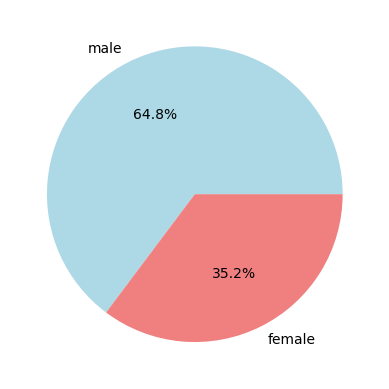

In [58]:
plt.pie(sex_counts,labels=sex_counts.index, autopct='%1.1f%%',colors=['lightblue', 'lightcoral'])

In [59]:
survived_counts=data['Survived'].astype(str).value_counts()

In [60]:
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a3f46c5fd0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

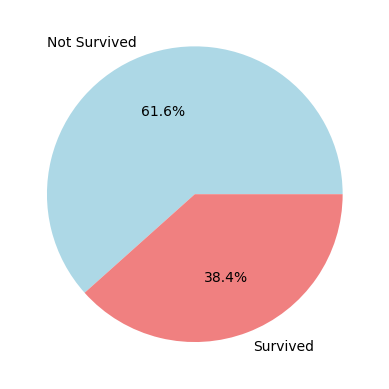

In [61]:
plt.pie(survived_counts,labels=["Not Survived", "Survived"], autopct='%1.1f%%',colors=['lightblue', 'lightcoral'])

C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\3240715831.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["Pclass"], y=data["Survived"]*100,hue=data['Sex'],ci=None,palette="Set2")


<Axes: xlabel='Pclass', ylabel='Survived'>

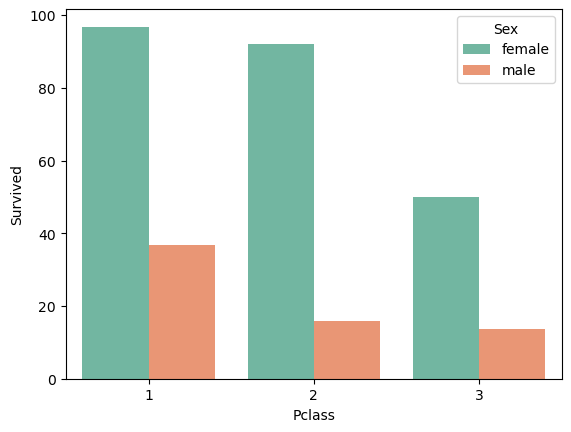

In [62]:
sns.barplot(x=data["Pclass"], y=data["Survived"]*100,hue=data['Sex'],ci=None,palette="Set2")

<Axes: xlabel='Pclass', ylabel='Count'>

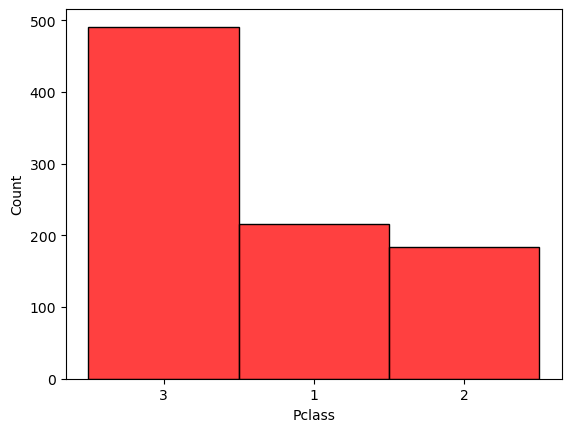

In [63]:
sns.histplot(data=data['Pclass'].astype(str),color='red')

C:\Users\Cyber\AppData\Local\Temp\ipykernel_21656\2609550996.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Sex'],y=data['Age'],data=data,palette='Set2')


<Axes: xlabel='Sex', ylabel='Age'>

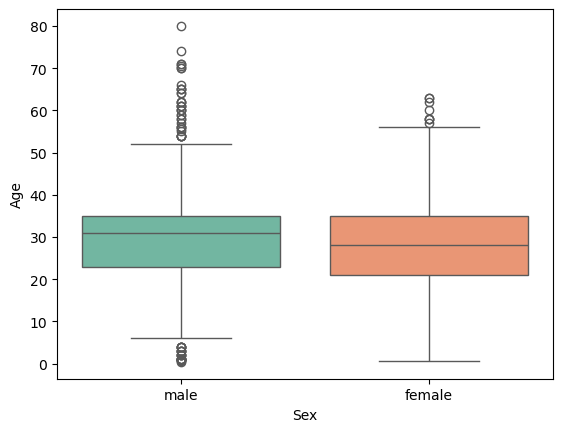

In [64]:
sns.boxplot(x=data['Sex'],y=data['Age'],data=data,palette='Set2')

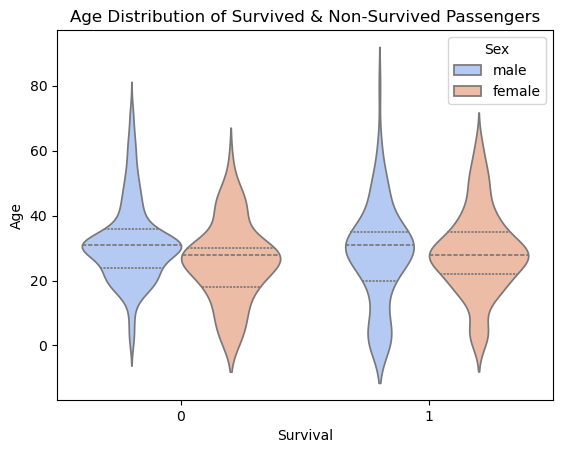

In [65]:
sns.violinplot(x="Survived", y="Age", hue="Sex",data=data, palette="coolwarm", inner="quartile")
plt.title("Age Distribution of Survived & Non-Survived Passengers")
plt.xlabel('Survival')
plt.show()

In [66]:
xl=data[['Pclass','Sex','Age']]
xl

,Pclass,Sex,Age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,28.0
889,1,male,26.0


In [67]:
for index, row in xl.iterrows():
    if row['Sex'] == 'male':
        xl.at[index, 'Sex'] =0
    elif row['Sex'] == 'female':
        xl.at[index, 'Sex'] = 1


In [68]:
xl

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
886,2,0,27.0
887,1,1,19.0
888,3,1,28.0
889,1,0,26.0


In [69]:
yl=data['Survived']

In [70]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(xl, yl, test_size=0.2, random_state=42)

In [71]:
model_l=LogisticRegression()

In [72]:
model_l.fit(Xl_train,yl_train)

LogisticRegression()

In [76]:
yl_pred=model_l.predict(Xl_test)

In [ ]:
accuracy_score(yl_test,yl_pred)*100

81.00558659217877